In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Question 1

## Part a)

In [2]:
A = np.array([[1,2,1,-1], [-1,1,0,2], [0,-1,-2,1]])
b = np.array([3,2,-2])
a = 0.1
g = 0.2
x = np.array([1,1,1,1])
k = 0

while np.linalg.norm(A.T @ A @ x-A.T @ b + g*x) >= 0.001:
    k = k+1
    x = x-a*(A.T @ A @ x-A.T @ b + g*x)
    print(k)
    print(x)

1
[0.98 0.98 0.98 0.98]
2
[0.9624 0.9804 0.9744 0.9584]
3
[0.942712 0.982392 0.966832 0.943272]
4
[0.92337456 0.98663216 0.95983296 0.92954576]
5
[0.90444937 0.99160416 0.95259323 0.91685286]
6
[0.88610663 0.99701264 0.94521401 0.90467728]
7
[0.86834369 1.00263626 0.93769019 0.89287482]
8
[0.85113788 1.00837882 0.93006486 0.88136622]
9
[0.83445305 1.01418084 0.92237569 0.87011787]
10
[0.81825308 1.02000493 0.91465805 0.85911149]
11
[0.80250456 1.02582449 0.90694203 0.8483362 ]
12
[0.78717776 1.03161966 0.89925278 0.83778418]
13
[0.77224667 1.037375   0.89161095 0.82744912]
14
[0.75768854 1.04307836 0.88403333 0.81732545]
15
[0.74348353 1.04872014 0.87653343 0.80740807]
16
[0.72961421 1.05429273 0.86912206 0.79769217]
17
[0.71606526 1.05979021 0.86180772 0.78817318]
18
[0.70282306 1.06520798 0.85459705 0.77884672]
19
[0.6898755  1.07054258 0.8474951  0.76970859]
20
[0.6772117  1.07579145 0.84050564 0.7607547 ]
21
[0.66482183 1.08095279 0.83363137 0.75198113]
22
[0.65269695 1.08602544 0.

## Part c)

In [3]:
xhat = np.linalg.inv(A.T @ A+g*np.eye(len(A.T @ A))) @ A.T @ b
print(np.round(xhat,4))

[0.0629 1.3382 0.4907 0.3224]


## Part d)

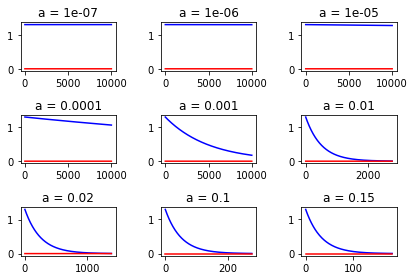

In [4]:
A = np.array([[1,2,1,-1], [-1,1,0,2], [0,-1,-2,1]])
b = np.array([3,2,-2])
ak = np.array([0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.02, 0.1, 0.15])
g = 0.2
n = 0

for a in ak:
    diff = np.zeros(1)
    x = np.array([1,1,1,1])
    k = 0
    n = n+1
    while np.linalg.norm(A.T @ A @ x-A.T @ b + g*x) >= 0.001:
        if k == 10000:
            break
        k = k+1
        x = x-a*(A.T @ A @ x-A.T @ b + g*x)
        diff = np.append(diff,np.linalg.norm(x-xhat))

    # Delete the first element in diff
    diff = np.delete(diff,0)
    
    # Plot the graphs
    ax = plt.subplot(3,3,n)
    plt.plot(range(k),diff,'-b')
    plt.plot(range(k),0.001*np.ones(len(range(k))),'-r')
    ax.title.set_text("a = " + str(a))
plt.tight_layout()
plt.show()  

## Part e)

In [5]:
# load the Sales dataset
df = pd.read_csv('CarSeats.csv')
target = df["Sales"]

# Delete the Target and Categorical Sets
del df["Sales"]
del df["ShelveLoc"]
del df["Urban"]
del df["US"]

print(df)
print(target)

     CompPrice  Income  Advertising  Population  Price  Age  Education
0          138      73           11         276    120   42         17
1          111      48           16         260     83   65         10
2          113      35           10         269     80   59         12
3          117     100            4         466     97   55         14
4          141      64            3         340    128   38         13
..         ...     ...          ...         ...    ...  ...        ...
395        138     108           17         203    128   33         14
396        139      23            3          37    120   55         11
397        162      26           12         368    159   40         18
398        100      79            7         284     95   50         12
399        134      37            0          27    120   49         16

[400 rows x 7 columns]
0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398    

In [6]:
# Print the mean and variance
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
print(df_scaled.mean(axis=0))
print(df_scaled.var(axis=0))

[ 3.81916720e-16  3.55271368e-17  2.66453526e-17  1.59872116e-16
 -6.21724894e-17  1.28785871e-16 -1.33226763e-16]
[1. 1. 1. 1. 1. 1. 1.]


In [7]:
# Centre the target variable
centred = target-target.mean(axis=0)
centred_target = centred.to_numpy()
print(centred_target)

[ 2.003675e+00  3.723675e+00  2.563675e+00 -9.632500e-02 -3.346325e+00
  3.313675e+00 -8.663250e-01  4.353675e+00 -9.563250e-01 -2.806325e+00
  1.513675e+00  4.463675e+00 -3.516325e+00  3.463675e+00  3.673675e+00
  1.213675e+00  8.367500e-02  4.793675e+00  6.413675e+00  1.233675e+00
 -1.086325e+00  4.633675e+00 -2.416325e+00 -1.626325e+00  2.643675e+00
  7.403675e+00  8.336750e-01 -2.226325e+00 -4.506325e+00  3.136750e-01
  6.053675e+00  7.536750e-01 -1.296325e+00  1.273675e+00 -4.826325e+00
  3.573675e+00  1.393675e+00 -2.546325e+00 -9.063250e-01 -4.256325e+00
 -5.426325e+00  4.636750e-01  2.933675e+00 -3.376325e+00 -3.336325e+00
 -2.936325e+00  4.943675e+00 -3.116325e+00 -3.586325e+00  3.113675e+00
 -6.076325e+00 -3.076325e+00  4.136750e-01 -5.763250e-01 -2.596325e+00
 -6.463250e-01  4.413675e+00 -6.586325e+00 -2.076325e+00 -2.286325e+00
  8.236750e-01 -1.763250e-01 -5.676325e+00  9.736750e-01  3.036750e-01
 -2.596325e+00  1.353675e+00  1.513675e+00  5.893675e+00  4.936750e-01
  1.96

In [8]:
# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(df_scaled,centred_target,test_size=0.50,shuffle=False)

X_train_first,X_train_last=X_train[0],X_train[-1]
print(X_train_first); print(X_train_last)

[ 0.85045499  0.15536099  0.65717702  0.07581929  0.17782345 -0.69978222
  1.18444912]
[-0.1942498   0.6920138  -0.24615909  0.47665602  0.43155489  0.65991828
  0.03820804]


In [9]:
X_test_first,X_test_last=X_test[0],X_test[-1]
print(X_test_first); print(X_test_last)

[ 1.24221929  0.83512122 -0.99893918  0.57176982  1.27732635  0.53630914
 -0.72595268]
[ 0.58927879 -1.13260576 -0.99893918 -1.61584759  0.17782345 -0.26715025
  0.80236876]


In [10]:
Y_train_first,Y_train_last=Y_train[0],Y_train[-1]
print(Y_train_first); print(Y_train_last)

2.0036750000000003
-1.0763249999999998


In [11]:
Y_test_first,Y_test_last=Y_test[0],Y_test[-1]
print(Y_test_first); print(Y_test_last)

-1.936325
2.213675000000001


## Part g)

In [12]:
phi = 0.5
bhat = np.linalg.inv(X_train.T @ X_train+200*phi*np.eye(len(X_train.T @ X_train))) @ (X_train.T @ Y_train)
print(np.round(bhat,4))

[ 0.6807  0.2823  0.6516  0.0083 -1.1713 -0.4009 -0.1006]


## Part i)

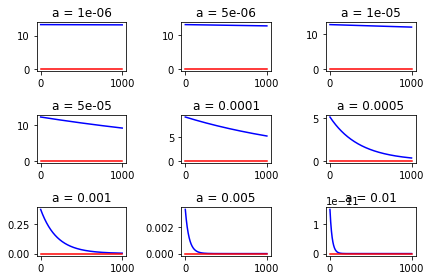

In [13]:
b = np.ones(len(X_train[0]))
ak = np.array([0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01])
phi = 0.5
n = 0
Lb = 1/len(X_train)*(Y_train.T@Y_train-2*Y_train.T@X_train@bhat+bhat.T@X_train.T@X_train@bhat)+phi*bhat.T@bhat

for a in ak:
    LList = np.zeros(1)
    k = 0
    n = n+1
    for k in range(1000):
        dL = 0
        # Compute Sum of derivative L
        for m in range(len(X_train)):
            dL = dL-2*X_train[m]*(Y_train[m]-X_train[m].T@b)+2*phi*b
            
        # Obtain b(k)
        b = b-a/len(X_train)*dL
        # Obtain L(k)
        L = 1/len(X_train)*(Y_train.T@Y_train-2*Y_train.T@X_train@b+b.T@X_train.T@X_train@b)+phi*b.T@b
        LList = np.append(LList,L-Lb)

    # Delete the first element in LList
    LList = np.delete(LList,0)
    
    # Plot the graphs
    ax = plt.subplot(3,3,n)
    plt.plot(range(k+1),LList,'-b')
    plt.plot(range(k+1),np.zeros(len(range(k+1))),'-r')
    ax.title.set_text("a = " + str(a))
plt.tight_layout()
plt.show()  

## Part i) (i)

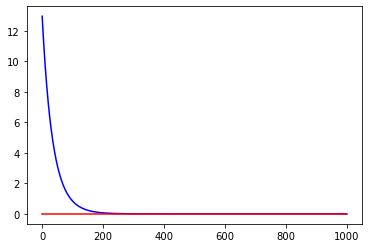

[ 0.68061045  0.28229625  0.65155769  0.00834477 -1.17123274 -0.40089998
 -0.10063028]


In [14]:
b = np.ones(len(X_train[0]))
a = 0.005
phi = 0.5
n = 0
Lb = 1/len(X_train)*(Y_train.T@Y_train-2*Y_train.T@X_train@bhat+bhat.T@X_train.T@X_train@bhat)+phi*bhat.T@bhat


LList = np.zeros(1)
k = 0
n = n+1
for k in range(1000):
    dL = 0
    # Compute Sum of derivative L
    for m in range(len(X_train)):
        dL = dL-2*X_train[m]*(Y_train[m]-X_train[m].T@b)+2*phi*b

    # Obtain b(k)
    b = b-a/len(X_train)*dL
    # Obtain L(k)
    L = 1/len(X_train)*(Y_train.T@Y_train-2*Y_train.T@X_train@b+b.T@X_train.T@X_train@b)+phi*b.T@b
    LList = np.append(LList,L-Lb)

# Delete the first element in LList
LList = np.delete(LList,0)

# Plot the graphs
plt.plot(range(k+1),LList,'-b')
plt.plot(range(k+1),np.zeros(len(range(k+1))),'-r')
plt.show()

print(b)

In [15]:
TrainMSE = 1/200*np.linalg.norm(Y_train-X_train@b)**2
print(TrainMSE)

4.559027077966185


## Part i) (ii)

In [16]:
TestMSE = 1/200*np.linalg.norm(Y_test-X_test@b)**2
print(TestMSE)

4.380486336397683


## Part j)

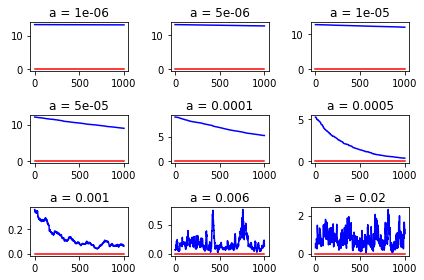

In [17]:
b = np.ones(len(X_train[0]))
ak = np.array([0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.006, 0.02])
phi = 0.5
n = 0
Lb = 1/len(X_train)*(Y_train.T@Y_train-2*Y_train.T@X_train@bhat+bhat.T@X_train.T@X_train@bhat)+phi*bhat.T@bhat

for a in ak:
    LList = np.zeros(1)
    k = 0
    n = n+1
    for k in range(1000):
        # Compute a random derivative L
        m = random.randrange(0, 199, 1)
        dL = -2*X_train[m]*(Y_train[m]-X_train[m].T@b)+2*phi*b
            
        # Obtain b(k)
        b = b-a*dL
        # Obtain L(k)
        L = 1/len(X_train)*(Y_train.T@Y_train-2*Y_train.T@X_train@b+b.T@X_train.T@X_train@b)+phi*b.T@b
        LList = np.append(LList,L-Lb)

    # Delete the first element in LList
    LList = np.delete(LList,0)
    
    # Plot the graphs
    ax = plt.subplot(3,3,n)
    plt.plot(range(k+1),LList,'-b')
    plt.plot(range(k+1),np.zeros(len(range(k+1))),'-r')
    ax.title.set_text("a = " + str(a))
plt.tight_layout()
plt.show()  

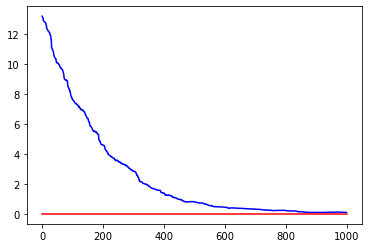

[ 0.57233303  0.41337308  0.6987318   0.12011793 -1.07964508 -0.26669333
 -0.07250526]


In [18]:
b = np.ones(len(X_train[0]))
a = 0.001
phi = 0.5
n = 0
Lb = 1/len(X_train)*(Y_train.T@Y_train-2*Y_train.T@X_train@bhat+bhat.T@X_train.T@X_train@bhat)+phi*bhat.T@bhat


LList = np.zeros(1)
k = 0
n = n+1
for k in range(1000):
    # Compute a random derivative L
    m = random.randrange(0, 199, 1)
    dL = -2*X_train[m]*(Y_train[m]-X_train[m].T@b)+2*phi*b

    # Obtain b(k)
    b = b-a*dL
    # Obtain L(k)
    L = 1/len(X_train)*(Y_train.T@Y_train-2*Y_train.T@X_train@b+b.T@X_train.T@X_train@b)+phi*b.T@b
    LList = np.append(LList,L-Lb)

# Delete the first element in LList
LList = np.delete(LList,0)

# Plot the graphs
plt.plot(range(k+1),LList,'-b')
plt.plot(range(k+1),np.zeros(len(range(k+1))),'-r')
plt.show()

print(b)

In [19]:
TrainMSE = 1/200*np.linalg.norm(Y_train-X_train@b)**2
print(TrainMSE)

4.791091282987926


In [20]:
TestMSE = 1/200*np.linalg.norm(Y_test-X_test@b)**2
print(TestMSE)

4.645183208717851
